## Mercedes-Benz Greener Manufacturing
Project 1 

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

In [107]:
import os as os
os.getcwd()

'D:\\Data Science\\SL Downloads\\dataset\\Merc Benz'

In [108]:
os.chdir('D:\Data Science\SL Downloads\dataset\Merc Benz')

In [8]:
os.getcwd()

'D:\\Data Science\\SL Downloads\\dataset\\Merc Benz'

In [109]:
import pandas as pd
rawdata=pd.read_csv('./train/train.csv')

In [10]:
rawdata.head(5)

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [11]:
# List of int, float,object columns

Types = rawdata.dtypes.reset_index()
Types.columns = ["Count", "Column Type"]
Types.groupby("Column Type").count()

Count
Column Type       
int64          369
float64          1
object           8

There are 8 categoric columns and remaining are numeric

In [12]:
rawdata.shape

(4209, 378)

In [13]:
rawdata.describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

In [14]:
rawdata.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

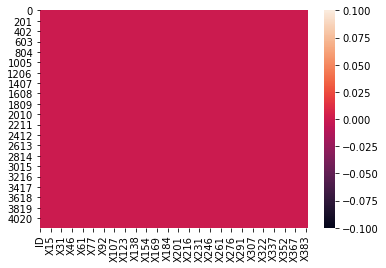

In [15]:
import seaborn as sns
sns.heatmap(rawdata.isnull())

Looks like no null values in any columns

# Checking unique values in each columns


In [128]:
#rawdata['X0'].unique()

for i in rawdata.drop(['ID','y'],axis=1):
    print('Unique elements in.. '+ i +'-column')
    print(rawdata[i].unique())
    print('-----------------------------------------')

Unique elements in.. X0-column
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
-----------------------------------------
Unique elements in.. X1-column
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
-----------------------------------------
Unique elements in.. X2-column
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
-----------------------------------------
Unique elements in.. X3-column
['a' 'e' 'c' 'f' 'd' 'b' 'g']
-----------------------------------------
Unique elements in.. X4-column
['d' 'b' 'c' 'a']
-----------------------------------------
Unique elements in.. X5-column
['u' 'y' 'x' 'h' 'g' 'f' 'j'

[0 1]
-----------------------------------------
Unique elements in.. X277-column
[0 1]
-----------------------------------------
Unique elements in.. X278-column
[0 1]
-----------------------------------------
Unique elements in.. X279-column
[0 1]
-----------------------------------------
Unique elements in.. X280-column
[0 1]
-----------------------------------------
Unique elements in.. X281-column
[0 1]
-----------------------------------------
Unique elements in.. X282-column
[0 1]
-----------------------------------------
Unique elements in.. X283-column
[0 1]
-----------------------------------------
Unique elements in.. X284-column
[0 1]
-----------------------------------------
Unique elements in.. X285-column
[1 0]
-----------------------------------------
Unique elements in.. X286-column
[0 1]
-----------------------------------------
Unique elements in.. X287-column
[0 1]
-----------------------------------------
Unique elements in.. X288-column
[0 1]
----------------------

In [11]:
import matplotlib

In [129]:
import pandas_profiling as pp
pp.ProfileReport(rawdata)

## Observation
Number of observations	4209

Number of variables	378

BOOL	368
CAT	8
NUM	2

Null values- None

Target Y- Distinct count-2545

X11 and few others can be neglected, because all rows have same values. 
Many columns show high correlation


In [14]:
rawdata.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [16]:
## Annova check on Categorical columns

import statsmodels.api as sm
from statsmodels.formula.api import ols

col = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for i in col:
    model = ols('y ~ ' + i , data=rawdata).fit()
    
    print('Column : {}, F-statistic : {}, p-value : {}'.format(i, model.fvalue, model.f_pvalue))


Column : X0, F-statistic : 122.31407564900334, p-value : 0.0
Column : X1, F-statistic : 6.988434069498696, p-value : 1.1280321132760776e-24
Column : X2, F-statistic : 28.256994858808234, p-value : 1.9306837593615617e-196
Column : X3, F-statistic : 30.991746795319916, p-value : 1.2512325123725502e-36
Column : X4, F-statistic : 2.6188965213725144, p-value : 0.04920919630464415
Column : X5, F-statistic : 2.152702885496953, p-value : 0.0004035846965797788
Column : X6, F-statistic : 4.1750460361125, p-value : 3.6159365940001084e-06
Column : X8, F-statistic : 5.030918412130861, p-value : 1.2692541091299133e-14


High F statistics scores columns can be kept. 
X4 has pvalue close to 0.05, so we fail to reject Null Hypotghesis that- This columns dont affect target.


In [18]:
Types = rawdata.dtypes.reset_index()
Types.columns = ["Count", "Column Type"]
Types.groupby("Column Type").count()

# Numeric columns
numeric=Types[Types["Column Type"]=='int64'].Count
numeric
rawdata[numeric]

ID  X10  X11  X12  X13  X14  X15  X16  X17  X18  ...  X375  X376  \
0        0    0    0    0    1    0    0    0    0    1  ...     0     0   
1        6    0    0    0    0    0    0    0    0    1  ...     1     0   
2        7    0    0    0    0    0    0    0    1    0  ...     0     0   
3        9    0    0    0    0    0    0    0    0    0  ...     0     0   
4       13    0    0    0    0    0    0    0    0    0  ...     0     0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
4204  8405    0    0    0    0    1    0    0    0    0  ...     1     0   
4205  8406    0    0    0    0    0    0    0    0    0  ...     0     1   
4206  8412    0    0    1    1    0    0    0    0    0  ...     0     0   
4207  8415    0    0    0    0    1    0    0    0    0  ...     0     0   
4208  8417    0    0    0    0    0    0    0    0    0  ...     1     0   

      X377  X378  X379  X380  X382  X383  X384  X385  
0        1     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0  
2        0     0     0     0     1     0     0     0  
3        0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0     0     0  
4205     0     0     0     0     0     0     0     0  
4206     1     0     0     0     0     0     0     0  
4207     0     0     0     0     0     0     0     0  
4208     0     0     0     0     0     0     0     0  

[4209 rows x 369 columns]

## F regression on Numeric columns


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

ftr = rawdata[numeric].drop(['ID'],axis=1)
trgt= rawdata.y

fs= SelectKBest(f_regression, k="all")
fs.fit(ftr,trgt)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k='all', score_func=<function f_regression at 0x000001B03FBB6F78>)

In [20]:
scores  = list(fs.scores_)
pvalues = list(fs.pvalues_)
fcols= list(ftr.columns)

scores[0:5]
pvalues[0:5]
fcols[0:5]

['X10', 'X11', 'X12', 'X13', 'X14']

In [21]:
# List of tuples with feature and their importance
table = [(col, score, round (pvalue,4))  for col, score, pvalue in zip(fcols, scores, pvalues)]
print(table[0:5])


[('X10', 3.065618674114047, 0.08), ('X11', nan, nan), ('X12', 34.19472628005719, 0.0), ('X13', 9.82760413138798, 0.0017), ('X14', 163.8983133169353, 0.0)]


In [22]:
## sorting with pvalues in desc order of pvalues
table= sorted(table, key = lambda x: x[2], reverse = True)
print(table[0:5])

[('X11', nan, nan), ('X40', 0.003548743596460469, 0.9525), ('X32', 0.012882504616845423, 0.9096), ('X18', 0.01345775472717495, 0.9077), ('X92', 0.04617602698035259, 0.8299)]


In [25]:
#Lets put them in a dataframe

newdf= pd.DataFrame(table, columns = ['Colname', 'fscore', 'pvalue'])
newdf

# There are some NAN values too

Colname      fscore  pvalue
0       X11         NaN     NaN
1       X40    0.003549  0.9525
2       X32    0.012883  0.9096
3       X18    0.013458  0.9077
4       X92    0.046176  0.8299
..      ...         ...     ...
363    X371  204.639375  0.0000
364    X376   55.399436  0.0000
365    X378  301.699496  0.0000
366    X379   19.496687  0.0000
367    X382  110.266258  0.0000

[368 rows x 3 columns]

In [26]:
# Our Null Hyp - These columns don't have any effect on target
# If pvalue < 0.05 we reject Null Hyp, otherwise fail to reject Null Hyp
# So for pvalues greater than 0.05 , they don't have any effect on target
# Hence, high p values can be rejected, meaning those columns can be neglected.

dropcols= newdf[newdf['pvalue'] > 0.05]
#dropcols=dropcols['Colname']
dropcols=dropcols.Colname.values
dropcols


array(['X40', 'X32', 'X18', 'X92', 'X24', 'X42', 'X83', 'X103', 'X49',
       'X89', 'X86', 'X38', 'X41', 'X87', 'X74', 'X33', 'X39', 'X36',
       'X26', 'X70', 'X59', 'X60', 'X58', 'X57', 'X15', 'X95', 'X73',
       'X10', 'X63', 'X65', 'X67', 'X210', 'X207', 'X257', 'X258', 'X230',
       'X254', 'X266', 'X200', 'X206', 'X248', 'X220', 'X213', 'X240',
       'X245', 'X203', 'X226', 'X288', 'X262', 'X259', 'X280', 'X253',
       'X260', 'X246', 'X340', 'X294', 'X175', 'X292', 'X296', 'X364',
       'X365', 'X332', 'X123', 'X366', 'X338', 'X145', 'X182', 'X139',
       'X384', 'X114', 'X117', 'X105', 'X168', 'X129', 'X164', 'X196',
       'X184', 'X181', 'X190', 'X192', 'X124', 'X153', 'X345', 'X295',
       'X319', 'X359', 'X186', 'X194', 'X369', 'X374', 'X357', 'X356',
       'X138', 'X146', 'X160', 'X358', 'X140', 'X173', 'X353', 'X385',
       'X324', 'X361', 'X133', 'X195', 'X104', 'X323', 'X161', 'X375',
       'X307', 'X143', 'X152', 'X326', 'X141', 'X318'], dtype=object)

In [27]:
# Lets check Nan values
newdf.isnull().sum()
# 12 columns have Null values
newdf[newdf['fscore'].isnull()]

Colname  fscore  pvalue
0       X11     NaN     NaN
8       X93     NaN     NaN
92     X107     NaN     NaN
105    X233     NaN     NaN
106    X235     NaN     NaN
144    X268     NaN     NaN
182    X289     NaN     NaN
183    X290     NaN     NaN
185    X293     NaN     NaN
191    X297     NaN     NaN
192    X330     NaN     NaN
193    X347     NaN     NaN

In [28]:
rawdata['X11']
#rawdata['X11'].unique()
rawdata['X11'].sum()
## These columns all have only one value '0', also highlighted by Pandas profiling
## These columns can also be ignored.

0

## Now lets try Machine learning models for regression

1. Without discarding any columns, lets check the performance

In [29]:
#One hot encoding

import pandas as pd
rawdata=pd.get_dummies(rawdata)

In [31]:
rawdata

ID       y  X10  X11  X12  X13  X14  X15  X16  X17  ...  X8_p  X8_q  \
0        0  130.81    0    0    0    1    0    0    0    0  ...     0     0   
1        6   88.53    0    0    0    0    0    0    0    0  ...     0     0   
2        7   76.26    0    0    0    0    0    0    0    1  ...     0     0   
3        9   80.62    0    0    0    0    0    0    0    0  ...     0     0   
4       13   78.02    0    0    0    0    0    0    0    0  ...     0     0   
...    ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
4204  8405  107.39    0    0    0    0    1    0    0    0  ...     0     1   
4205  8406  108.77    0    0    0    0    0    0    0    0  ...     0     0   
4206  8412  109.22    0    0    1    1    0    0    0    0  ...     0     0   
4207  8415   87.48    0    0    0    0    1    0    0    0  ...     0     0   
4208  8417  110.85    0    0    0    0    0    0    0    0  ...     0     0   

      X8_r  X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
0        0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     1     0  
3        0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0     0     0  
4205     0     0     0     0     0     0     0     0  
4206     0     0     0     0     0     0     0     0  
4207     0     0     0     1     0     0     0     0  
4208     0     0     0     0     0     1     0     0  

[4209 rows x 565 columns]

In [30]:
# Collecting X and Y
X = rawdata.drop(['ID','y'],axis=1).values
Y = rawdata['y'].values

In [200]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [201]:
Y

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [33]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.3)

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2946, 563)
(2946,)
(1263, 563)
(1263,)


## Linear Regression

In [35]:
# import the ML algorithm
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
linreg.coef_

array([ 6.38201729e+09,  2.52930663e+13, -6.21807830e+12,  1.26166743e+12,
       -6.21807830e+12, -8.42227925e+12, -7.20543087e+12, -1.18912553e+13,
       -6.21807830e+12, -6.21807830e+12, -6.21807830e+12, -3.17231637e+13,
       -6.21807830e+12, -8.91930923e+13,  5.99955663e+12,  4.74955535e+13,
        5.25944233e-02, -3.70612945e+13,  1.20189075e+14, -3.97024793e+12,
       -7.65928169e+13,  3.03615617e+13, -4.82158587e+13,  6.38201729e+09,
        8.19696818e+13, -8.79691189e+12, -5.37686482e+12,  3.84900331e-01,
        1.17351531e+11,  4.89890727e+12,  4.89890727e+12,  4.76025271e+00,
       -1.96779573e+13, -2.11252151e+12, -7.92321777e+00,  3.75000000e-01,
        5.19995117e+00,  1.57234763e+11,  3.30883789e+00, -5.82519531e-01,
        2.71240234e-01, -1.85626865e+12,  8.01052120e+12, -1.25531952e+13,
       -1.34082031e+00,  3.00292969e-01, -5.13769531e+00, -2.41617579e+13,
        4.81287771e+12, -8.66353489e+12, -1.08688100e+13, -1.46498207e+13,
       -1.51517029e+12, -

In [192]:
linreg.intercept_

-8038426659044.718

In [193]:
Y_test.shape

(1263,)

In [204]:
 #Making predictions
# make predictions on the testing set
Y_pred = linreg.predict(X_test)


In [196]:
Y_pred.shape

(1263,)

In [205]:
# import libraries for metrics 
import numpy as np
from sklearn import metrics

# Model evaluation metrics for regression
#print('y-intercept             : ', linreg.intercept_)
#print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAPE                    : ', np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100)
print('MPE                     : ', np.mean((Y_test - Y_pred) / Y_test) * 100)
print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))

Mean Abs Error   MAE    :  86239746006.26898
Mean Sq  Error MSE      :  2.9354845283889697e+24
Root Mean Sq Error RMSE :  1713325575712.0332
MAPE                    :  95008746435.94705
MPE                     :  85209316837.01973
r2 value                :  -1.958829699419431e+22


## Lets try KKN for regression

In [206]:
from sklearn import neighbors


In [207]:
# Modelling 
clf = neighbors.KNeighborsRegressor()
clf.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [208]:
Y_pred=clf.predict(X_test)

In [209]:
Y_pred

array([ 83.958, 108.846, 109.786, ..., 116.314,  81.93 ,  93.062])

In [210]:
Y_test

array([ 73.36, 117.59, 107.74, ..., 110.44,  75.41,  88.62])

## KNN metrics

In [211]:
# import libraries for metrics and reporting
import numpy as np
from sklearn import metrics
# Model evaluation metrics for regression
#print('y-intercept             : ', linreg.intercept_)
#print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAPE                    : ', np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100)
print('MPE                     : ', np.mean((Y_test - Y_pred) / Y_test) * 100)
print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))


Mean Abs Error   MAE    :  6.1405114806017425
Mean Sq  Error MSE      :  80.14530435154396
Root Mean Sq Error RMSE :  8.95239098518066
MAPE                    :  5.956790750464435
MPE                     :  -0.9069589578306889
r2 value                :  0.46519560599090515


## Lets try Decision Tree for regression

In [217]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

In [218]:
Y_pred=clf.predict(X_test)

In [214]:
Y_pred

array([ 98.81, 109.66, 107.66, ..., 116.36,  98.81,  95.24])

In [215]:
Y_test

array([ 73.36, 117.59, 107.74, ..., 110.44,  75.41,  88.62])

## Decision Tree metrics

In [219]:
# import libraries for metrics and reporting
import numpy as np
from sklearn import metrics
# Model evaluation metrics for regression
#print('y-intercept             : ', linreg.intercept_)
#print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAPE                    : ', np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100)
print('MPE                     : ', np.mean((Y_test - Y_pred) / Y_test) * 100)
print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))

Mean Abs Error   MAE    :  7.576384006334125
Mean Sq  Error MSE      :  174.44319114445327
Root Mean Sq Error RMSE :  13.20769439169658
MAPE                    :  7.432946144283889
MPE                     :  -1.193877814069242
r2 value                :  -0.1640480485270599


## Lets try Random Forest for regression

In [130]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf = clf.fit(X_train, Y_train)

In [131]:
Y_pred=clf.predict(X_test)

In [232]:
Y_pred

array([ 85.13778333, 109.8769    , 109.612     , ..., 117.5199    ,
        89.5909    ,  95.0303    ])

In [229]:
Y_test

array([ 73.36, 117.59, 107.74, ..., 110.44,  75.41,  88.62])

## Random Forest metrics

In [233]:
# import libraries for metrics and reporting
import numpy as np
from sklearn import metrics
# Model evaluation metrics for regression
#print('y-intercept             : ', linreg.intercept_)
#print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAPE                    : ', np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100)
print('MPE                     : ', np.mean((Y_test - Y_pred) / Y_test) * 100)
print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))

Mean Abs Error   MAE    :  5.612367513301778
Mean Sq  Error MSE      :  83.32863201151974
Root Mean Sq Error RMSE :  9.128451786120127
MAPE                    :  5.43357654940373
MPE                     :  -0.8660620180439603
r2 value                :  0.44395346792804136


## Some tunning on Random Forest

With K-Folds cross-validator

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).Each fold is then used once as a validation while the k - 1 remaining folds form the training set.



In [3]:
from sklearn.model_selection import KFold
KF= KFold(n_splits=10)


Parameters of RF regressor

1. n_estimators int, default=100 -The number of trees in the forest.
2. min_samples_split, int or float, default=2 -- The minimum number of samples required to split an internal node:
3. max_depth, int, default=None, The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
4. criterion {“mse”, “mae”}, default=”mse” The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.
5. max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
The number of features to consider when looking for the best split:


In [132]:
clf = RandomForestRegressor(n_estimators=50,min_samples_split=0.1, max_depth=10, criterion='mse', max_features='sqrt')
clf = clf.fit(X_train, Y_train)

Evaluate a score by cross-validation

1. estimator= model to fit, here we are using RF
2. cv,int, cross-validation generator or an iterable, default=None. Determines the cross-validation splitting strategy. We will use 10 from KF
3.scoring-str or callable, default=None
A str (see model evaluation documentation) or a scorer callable object / function with signature scorer(estimator, X, y) which should return only a single value. Similar to cross_validate but only a single metric is permitted.


In [259]:
from sklearn.model_selection import cross_val_score

KFresult=cross_val_score(estimator=clf,X=X,y=Y,cv=KF, scoring='neg_mean_squared_error')
print( 'Mean Squared Error : ', KFresult.mean())

Mean Squared Error :  -77.55809997635885


# Feature elimination

In [295]:
# from F regression on numeric cols 
dropcols
# columns with only one value in them
dropcols2=newdf[newdf['fscore'].isnull()].Colname.values
# from Annova on Cat columns- X4 can be discarded


In [307]:
rawdata=pd.read_csv('./train/train.csv')
# dropping x4
rawdata = rawdata.drop(['X4'],axis=1)

#dropping dropcols columns
dropcols=pd.Series(list(dropcols))
rawdata=rawdata.drop(rawdata[dropcols],axis=1)

#dropping dropcols2 columns
dropcols=pd.Series(list(dropcols2))
rawdata=rawdata.drop(rawdata[dropcols2],axis=1)


# Re-trying Machine Learning again after feature elimination

In [310]:
#One hot encoding

import pandas as pd
rawdata=pd.get_dummies(rawdata)

rawdata

ID       y  X12  X13  X14  X16  X17  X19  X20  X21  ...  X8_p  X8_q  \
0        0  130.81    0    1    0    0    0    0    0    1  ...     0     0   
1        6   88.53    0    0    0    0    0    0    0    0  ...     0     0   
2        7   76.26    0    0    0    0    1    0    0    0  ...     0     0   
3        9   80.62    0    0    0    0    0    0    0    0  ...     0     0   
4       13   78.02    0    0    0    0    0    0    0    0  ...     0     0   
...    ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
4204  8405  107.39    0    0    1    0    0    0    0    0  ...     0     1   
4205  8406  108.77    0    0    0    0    0    0    0    0  ...     0     0   
4206  8412  109.22    1    1    0    0    0    0    0    0  ...     0     0   
4207  8415   87.48    0    0    1    0    0    0    0    0  ...     0     0   
4208  8417  110.85    0    0    0    0    0    0    1    0  ...     0     0   

      X8_r  X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
0        0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     1     0  
3        0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0     0     0  
4205     0     0     0     0     0     0     0     0  
4206     0     0     0     0     0     0     0     0  
4207     0     0     0     1     0     0     0     0  
4208     0     0     0     0     0     1     0     0  

[4209 rows x 435 columns]

In [311]:

# Collecting X and Y
X = rawdata.drop(['ID','y'],axis=1).values
Y = rawdata['y'].values

In [313]:
Y

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [46]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.3)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2946, 563)
(2946,)
(1263, 563)
(1263,)


In [66]:
## KKN for regression

from sklearn import neighbors


# Modelling 
clf = neighbors.KNeighborsRegressor(n_neighbors=17, metric='hamming', weights= 'distance')
clf.fit(X_train, Y_train)

Y_pred=clf.predict(X_test)

Params for KNN

1.n_neighborsint, default=5. Number of neighbors to use by default for kneighbors queries.

2.weights{‘uniform’, ‘distance’} or callable, default=’uniform’ weight function used in prediction. Uniform weights are used by default.

3.algorithm {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’. Algorithm used to compute the nearest neighbors.

4. metric-str or callable, default=’minkowski’. The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 

In [67]:
## KNN metrics

# import libraries for metrics and reporting
import numpy as np
from sklearn import metrics
# Model evaluation metrics for regression
#print('y-intercept             : ', linreg.intercept_)
#print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAPE                    : ', np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100)
print('MPE                     : ', np.mean((Y_test - Y_pred) / Y_test) * 100)
print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))

Mean Abs Error   MAE    :  6.0120967701828905
Mean Sq  Error MSE      :  69.71454972762011
Root Mean Sq Error RMSE :  8.349523922213775
MAPE                    :  5.842483696558626
MPE                     :  -0.7464194805263897
r2 value                :  0.5334926312302448


With Kfold

In [68]:
from sklearn.model_selection import cross_val_score

KFresult=cross_val_score(estimator=clf,X=X,y=Y,cv=KF, scoring='neg_mean_squared_error')
print( 'Mean Squared Error : ', KFresult.mean())

Mean Squared Error :  -85.8781184879734


In [69]:
## Lets try Decision Tree for regression

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

Y_pred=clf.predict(X_test)


In [70]:
## Decision Tree metrics

# import libraries for metrics and reporting
import numpy as np
from sklearn import metrics
# Model evaluation metrics for regression
#print('y-intercept             : ', linreg.intercept_)
#print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAPE                    : ', np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100)
print('MPE                     : ', np.mean((Y_test - Y_pred) / Y_test) * 100)
print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))

Mean Abs Error   MAE    :  7.077850356294537
Mean Sq  Error MSE      :  110.57064731038695
Root Mean Sq Error RMSE :  10.515257833756952
MAPE                    :  6.895123333092348
MPE                     :  -0.5647868701924015
r2 value                :  0.2600967525219343


In [71]:
## Lets try Random Forest for regression

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf = clf.fit(X_train, Y_train)

Y_pred=clf.predict(X_test)

In [ ]:
## Random Forest metrics

# import libraries for metrics and reporting
import numpy as np
from sklearn import metrics
# Model evaluation metrics for regression
#print('y-intercept             : ', linreg.intercept_)
#print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAPE                    : ', np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100)
print('MPE                     : ', np.mean((Y_test - Y_pred) / Y_test) * 100)
print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))

In [41]:
## tunning on Random Forest

from sklearn.model_selection import KFold
KF= KFold(n_splits=10)


clf = RandomForestRegressor(n_estimators=50,min_samples_split=0.1, max_depth=10, criterion='mse', max_features='sqrt')
clf = clf.fit(X_train, Y_train)


from sklearn.model_selection import cross_val_score

KFresult=cross_val_score(estimator=clf,X=X,y=Y,cv=KF, scoring='neg_mean_squared_error')
print( 'Mean Squared Error : ', KFresult.mean())

Mean Squared Error :  -77.13722907425915


## Trying Gradient Boosting



#Params
1. n_estimatorsint, default=100, The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
2. min_samples_splitint or float, default=2.The minimum number of samples required to split an internal node:
3. learning_ratefloat, default=0.1. learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
4. loss{‘ls’, ‘lad’, ‘huber’, ‘quantile’}, default=’ls’. loss function to be optimized. ‘ls’ refers to least squares regression. ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order information of the input variables. ‘huber’ is a combination of the two. ‘quantile’ allows quantile regression
5. criterion{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’. The function to measure the quality of a split. Supported criteria are “friedman_mse” for the mean squared error with improvement score by Friedman, “mse” for mean squared error, and “mae” for the mean absolute error. The default value of “friedman_mse” is generally the best as it can provide a better approximation in some cases.

In [31]:
# Fit regression model
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1500, 
          'max_depth': 4, 
          'min_samples_split': 2,
          'learning_rate': 0.005, 
          'loss': 'ls'}

gbr = GradientBoostingRegressor(**params)

In [32]:
# Train GB regressor
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.3)

gbr.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.005, loss='ls',
                          max_depth=4, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
from sklearn.model_selection import cross_val_score

KFresult=cross_val_score(estimator=gbr,X=X,y=Y,cv=KF, scoring='neg_mean_squared_error')
print( 'Mean Squared Error : ', KFresult.mean())

Mean Squared Error :  -71.44837120067895


In [ ]:
# Tuning Gradient Boost
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
KF=KFold(n_splits=5, random_state=20)

scor={'r2':'r2', 'MSE':'neg_mean_squared_error'}

scores=cross_validate(estimator=gbr,X=X_train,y=Y_train,cv=KF,scoring=scor,return_train_score=True)

#scores.keys()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [46]:
print('Train MSE')
print(scores['train_MSE'].mean())
print('Train R2')
print(scores['train_r2'].mean())
print('-------------vs---------------')
print('Test MSE')
print(scores['test_MSE'].mean())
print('Test R2')
print(scores['test_r2'].mean())

Train MSE
-48.52062078593129
Train R2
0.7068512147562658
-------vs----------
Test MSE
-77.05777649444737
Test R2
0.5420662196735713


# Trying XG Boost

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [87]:
X_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
import xgboost as xgb
train = xgb.DMatrix(X_train,Y_train)
test  = xgb.DMatrix(X_test, Y_test)


In [97]:
# parameters for tuning
params={'max_depth': 7,
 'min_child_weight': 2,
 'eta': 0.005,
 'subsample': 0.8,
 'colsample_bytree': 1,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [98]:
num_boost_round = 999

In [100]:
%%time
model = xgb.train(
                params,
                train,
    num_boost_round=num_boost_round,
                evals=[(test, "Test")],
                early_stopping_rounds=10
)

[09:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:99.55287
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:99.05477
[2]	Test-mae:98.55984
[3]	Test-mae:98.06717
[4]	Test-mae:97.57676
[5]	Test-mae:97.08901
[6]	Test-mae:96.60383
[7]	Test-mae:96.12118
[8]	Test-mae:95.64020
[9]	Test-mae:95.16235
[10]	Test-mae:94.68639
[11]	Test-mae:94.21329
[12]	Test-mae:93.74271
[13]	Test-mae:93.27374
[14]	Test-mae:92.80702
[15]	Test-mae:92.34370
[16]	Test-mae:91.88194
[17]	Test-mae:91.42281
[18]	Test-mae:90.96605
[19]	Test-mae:90.51138
[20]	Test-mae:90.05868
[21]	Test-mae:89.60834
[22]	Test-mae:89.16090
[23]	Test-mae:88.71549
[24]	Test-mae:88.27136
[25]	Test-mae:87.82980
[26]	Test-mae:87.39087
[27]	Test-mae:86.95386
[28]	Test-mae:86.51924
[29]	Test-mae:86.08704
[30]	Test-mae:85.65672
[31]	Test-mae:85.22840
[32]	Test-mae:84.80257
[33]	Test-mae:84.3

[337]	Test-mae:18.34821
[338]	Test-mae:18.25600
[339]	Test-mae:18.16473
[340]	Test-mae:18.07416
[341]	Test-mae:17.98408
[342]	Test-mae:17.89420
[343]	Test-mae:17.80512
[344]	Test-mae:17.71557
[345]	Test-mae:17.62695
[346]	Test-mae:17.53937
[347]	Test-mae:17.45155
[348]	Test-mae:17.36463
[349]	Test-mae:17.27750
[350]	Test-mae:17.19186
[351]	Test-mae:17.10629
[352]	Test-mae:17.02115
[353]	Test-mae:16.93566
[354]	Test-mae:16.85067
[355]	Test-mae:16.76719
[356]	Test-mae:16.68483
[357]	Test-mae:16.60231
[358]	Test-mae:16.51978
[359]	Test-mae:16.43705
[360]	Test-mae:16.35446
[361]	Test-mae:16.27213
[362]	Test-mae:16.19111
[363]	Test-mae:16.11145
[364]	Test-mae:16.03209
[365]	Test-mae:15.95196
[366]	Test-mae:15.87193
[367]	Test-mae:15.79168
[368]	Test-mae:15.71298
[369]	Test-mae:15.63442
[370]	Test-mae:15.55643
[371]	Test-mae:15.47911
[372]	Test-mae:15.40217
[373]	Test-mae:15.32436
[374]	Test-mae:15.24698
[375]	Test-mae:15.17101
[376]	Test-mae:15.09475
[377]	Test-mae:15.02086
[378]	Test-mae:1

[688]	Test-mae:4.88579
[689]	Test-mae:4.88306
[690]	Test-mae:4.87984
[691]	Test-mae:4.87703
[692]	Test-mae:4.87399
[693]	Test-mae:4.87131
[694]	Test-mae:4.86869
[695]	Test-mae:4.86607
[696]	Test-mae:4.86369
[697]	Test-mae:4.86091
[698]	Test-mae:4.85864
[699]	Test-mae:4.85627
[700]	Test-mae:4.85363
[701]	Test-mae:4.85193
[702]	Test-mae:4.85011
[703]	Test-mae:4.84797
[704]	Test-mae:4.84567
[705]	Test-mae:4.84359
[706]	Test-mae:4.84133
[707]	Test-mae:4.83896
[708]	Test-mae:4.83708
[709]	Test-mae:4.83528
[710]	Test-mae:4.83382
[711]	Test-mae:4.83183
[712]	Test-mae:4.83017
[713]	Test-mae:4.82846
[714]	Test-mae:4.82633
[715]	Test-mae:4.82474
[716]	Test-mae:4.82331
[717]	Test-mae:4.82267
[718]	Test-mae:4.82111
[719]	Test-mae:4.81957
[720]	Test-mae:4.81905
[721]	Test-mae:4.81799
[722]	Test-mae:4.81637
[723]	Test-mae:4.81481
[724]	Test-mae:4.81357
[725]	Test-mae:4.81197
[726]	Test-mae:4.81010
[727]	Test-mae:4.80876
[728]	Test-mae:4.80828
[729]	Test-mae:4.80755
[730]	Test-mae:4.80634
[731]	Test-

In [101]:
# Predict
from sklearn import metrics
Y_pred = model.predict(train)

print("Training : metrics ...")
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_train, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_train, Y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

print('r2 value                : ', metrics.r2_score(Y_train, Y_pred))

Y_pred = model.predict(test)

print('\n')
print("Testing : metrics ...")
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(Y_test, Y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

print('r2 value                : ', metrics.r2_score(Y_test, Y_pred))

Training : metrics ...
Mean Abs Error   MAE    :  4.455029229440851
Mean Sq  Error MSE      :  58.8515100151492
Root Mean Sq Error RMSE :  7.671473783775136
r2 value                :  0.6401563599839779


Testing : metrics ...
Mean Abs Error   MAE    :  4.789231022270728
Mean Sq  Error MSE      :  58.27025971628166
Root Mean Sq Error RMSE :  7.6334959039932455
r2 value                :  0.6100741431454297


R2 of 0.64 & MSE of 58 on Training vs 0.61 R2 & 58 MSE on Testing looks okay. Increasing the max depth to a higher number (eg:20) gives better results on Testing set, but training score is poor.
At max depth of 7, and other tuning parameters, this trade off gives a decent result.